# This file shows how to run the PROPER models from wfirst_phaseb_proper. These were what were used for timing tests and the results were waved from here to be compared with POPPY results. 

In [1]:
import roman_phasec_proper as phasec
import proper

import numpy as np
import astropy.io.fits as fits 
import astropy.units as u
import time

from IPython.display import clear_output
from matplotlib.patches import Circle

from importlib import reload
import misc
reload(misc)

<module 'misc' from '/home/u21/kianmilani/Documents/roman-cgi-phasec-poppy/misc.py'>

In [2]:
phasec.copy_here()

In [3]:
phasec.data_dir

'/groups/douglase/kians-data-files/phasec_data'

In [2]:
proper.prop_use_fftw(DISABLE=False)
proper.prop_fftw_wisdom( 2048 ) 

Computing wisdom for 5 threads
Computing wisdom for 1 threads


# HLC

Computing aberrated coronagraphic field, flattened WFE & HLC solution
Computing aberrated coronagraphic field after EFC, mean polarization
Computing aberrated coronagraphic field after EFC, all polarizations
Computing 7 lam/D offset source


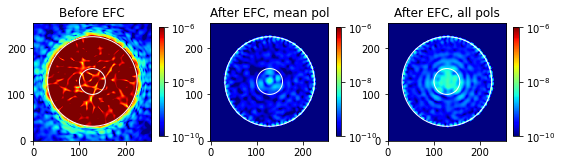

In [5]:
from roman_phasec_proper.examples import run_hlc
run_hlc.run_hlc()

2.9587987694013857e-06 m / pix


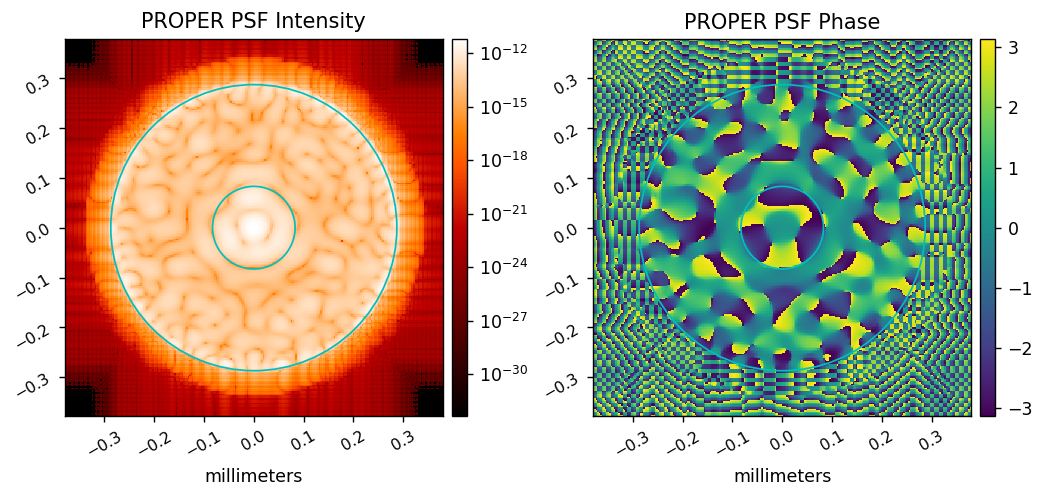

In [4]:
nlam = 7
lam0 = 0.575
bandwidth = 0.1
minlam = lam0 * (1 - bandwidth/2)
maxlam = lam0 * (1 + bandwidth/2)
lam_array = np.linspace( minlam, maxlam, nlam )
lam_array = np.array([0.575])

n = 256                 # output image dimension (must be power of 2)
final_sampling = 0.1    # output sampling in lam0/D

xoffset = 0
use_fpm = 1

use_hlc_dm_patterns = 1
use_errors = 0
use_dm1 = 1
use_dm2 = 1
dm1 = proper.prop_fits_read( phasec.lib_dir + r'/examples/hlc_best_contrast_dm1.fits' )
dm2 = proper.prop_fits_read( phasec.lib_dir + r'/examples/hlc_best_contrast_dm2.fits' )
dm1 = np.zeros((48,48))
dm2 = np.zeros((48,48))
polaxis = 0
use_fieldstop = 1

(wfs, wfs_sampling_m) = proper.prop_run_multi('roman_phasec', lam_array, n, QUIET=False, 
                                                PASSVALUE={'cor_type':'hlc',
                                                           'final_sampling_lam0':final_sampling, 
                                                           'source_x_offset':xoffset,
                                                           'use_fpm':use_fpm,
                                                           'use_hlc_dm_patterns':use_hlc_dm_patterns,
                                                           'use_errors': use_errors,
                                                           'use_dm1':use_dm1, 'dm1_m':dm1, 
                                                           'use_dm2':use_dm2, 'dm2_m':dm2,
                                                           'use_field_stop':use_fieldstop,
                                                           'polaxis':polaxis,
                                                          })
# psfs = np.abs(wfs)**2
# psf = np.sum( psfs, 0 ) / nlam

psf = wfs[0]
psf_sampling_m = wfs_sampling_m[0]*u.m/u.pix

reload(misc)
innwa = 2.8/final_sampling*psf_sampling_m.value * 1000 # inner and outer working angles in units of m
outwa = 9.7/final_sampling*psf_sampling_m.value * 1000
patches1 = [Circle((0,0),innwa,edgecolor='c', facecolor='none',lw=1),
            Circle((0,0),outwa,edgecolor='c', facecolor='none',lw=1)]
patches2 = [Circle((0,0),innwa,edgecolor='c', facecolor='none',lw=1),
            Circle((0,0),outwa,edgecolor='c', facecolor='none',lw=1)]
print(psf_sampling_m)
misc.myimshow2(np.abs(psf)**2, np.angle(wfs[0]),
               'PROPER PSF Intensity', 'PROPER PSF Phase',
               pxscl1=psf_sampling_m.to(u.mm/u.pix), pxscl2=psf_sampling_m.to(u.mm/u.pix),
               lognorm1=True, cmap1='gist_heat', cmap2='viridis',
               patches1=patches1, patches2=patches2)

save=False
if save:
    wf = np.zeros(shape=(2,n,n))
    wf[0,:,:] = np.abs(wfs[0])**2
    wf[1,:,:] = np.angle(wfs[0])

    wf_fname = 'proper-psfs-phasec/hlc/proper_psf_offax_nofs.fits'

    hdr = fits.Header()
    hdr['PIXELSCL'] = psf_sampling_m.value
    hdr['PIXSCLLD'] = final_sampling
    wf_hdu = fits.PrimaryHDU(data=wf, header=hdr)
    wf_hdu.writeto(wf_fname, overwrite=True)

# SPC-spec

Computing unaberrated coronagraphic field using compact model
Computing aberrated coronagraphic field using DM solution for flat WFE
Computing aberrated coronagraphic field using dark hole DM solution
Computing 7 lam/D offset source


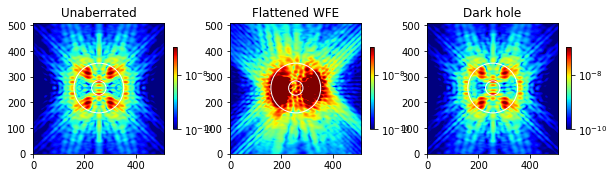

In [10]:
import run_spc_spec
run_spc_spec.run_spc_spec()

Lambda = 7.3000E-07   Throughput = 1.00
Applying lens
Propagating to secondary
Applying lens
Propagating to POMA FOLD
Propagating to M3
Applying lens
Propagating to M4
Applying lens
Propagating to M5
Applying lens
Propagating to TT FOLD
Propagating to FSM
Propagating to OAP1
Applying lens
Propagating to FOCM
Propagating to OAP2
Applying lens
Propagating to DM1
Propagating to DM2
Propagating to OAP3
Applying lens
Propagating to FOLD_3
Propagating to OAP4
Applying lens
Propagating to PUPIL_MASK
Propagating to OAP5
Applying lens
Propagating to FPM
Propagating to OAP6
Applying lens
Propagating to LYOT STOP
Propagating to OAP7
Applying lens
Propagating to FIELD_STOP
Propagating to OAP8
Applying lens
Propagating to filter
Propagating to IMAGING LENS
Applying lens at IMAGING LENS lens #1
Propagating
Applying lens at IMAGING LENS lens #2
Propagating to IMAGE
Total elapsed time (seconds) =  65.8237
3.7584888739686655e-06 m / pix


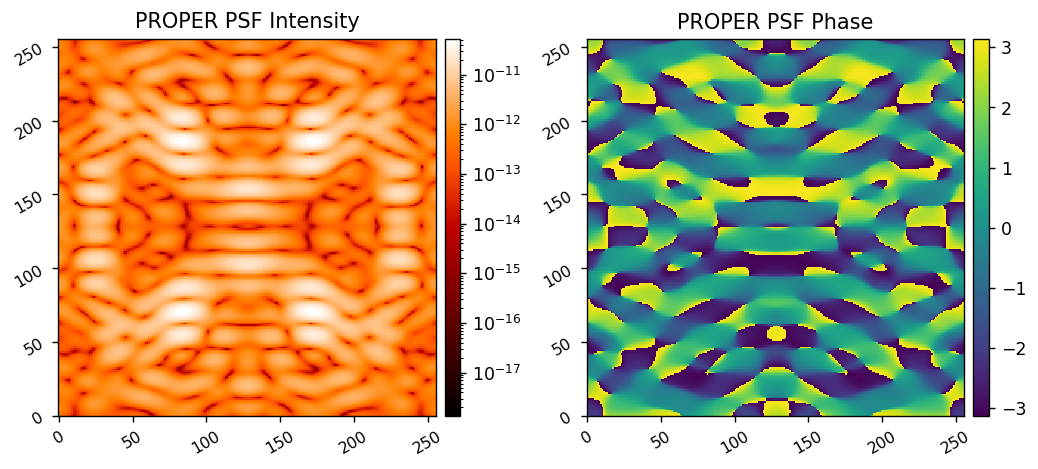

In [7]:
nlam = 7
lam0 = 0.730
bandwidth = 0.1
minlam = lam0 * (1 - bandwidth/2)
maxlam = lam0 * (1 + bandwidth/2)
lam_array = np.linspace( minlam, maxlam, nlam )
lam_array = np.array([0.730])

n = 256                 # output image dimension (must be power of 2)
final_sampling = 0.1    # output sampling in lam0/D

xoffset = 0
use_fpm = 1

use_errors = 0
use_dm1 = 0
use_dm2 = 0
dm1 = proper.prop_fits_read( phasec.lib_dir + r'/examples/spc_spec_band3_best_contrast_dm1.fits' )
dm2 = proper.prop_fits_read( phasec.lib_dir + r'/examples/spc_spec_band3_best_contrast_dm2.fits' )
polaxis = 0

(wfs, wfs_sampling_m) = proper.prop_run_multi('roman_phasec', lam_array, n, QUIET=False, 
                                                PASSVALUE={'cor_type':'spc-spec_band3',
                                                           'final_sampling_lam0':final_sampling, 
                                                           'source_x_offset':xoffset,
                                                           'use_fpm':use_fpm,
                                                           'use_errors': use_errors,
                                                           'use_pupil_defocus':0,
                                                           'use_dm1':use_dm1, 'dm1_m':dm1, 
                                                           'use_dm2':use_dm2, 'dm2_m':dm2,
                                                           'polaxis':polaxis,
                                                          })
# psfs = np.abs(wfs)**2
# psf = np.sum( psfs, 0 ) / nlam

psf = wfs[0]
psf_sampling_m = wfs_sampling_m[0]*u.m/u.pix

reload(misc)
innwa = 2.8/final_sampling*psf_sampling_m.value * 1000 # inner and outer working angles in units of m
outwa = 9.7/final_sampling*psf_sampling_m.value * 1000
patches1 = [Circle((0,0),innwa,edgecolor='c', facecolor='none',lw=1),
            Circle((0,0),outwa,edgecolor='c', facecolor='none',lw=1)]
patches2 = [Circle((0,0),innwa,edgecolor='c', facecolor='none',lw=1),
            Circle((0,0),outwa,edgecolor='c', facecolor='none',lw=1)]
print(psf_sampling_m)
misc.myimshow2(np.abs(psf)**2, np.angle(wfs[0]),
               'PROPER PSF Intensity', 'PROPER PSF Phase',
               pxscl=psf_sampling_m.to(u.mm/u.pix),
               lognorm1=True, cmap1='gist_heat', cmap2='viridis',
               patches1=patches1, patches2=patches2)

save=False
if save:
    wf = np.zeros(shape=(2,n,n))
    wf[0,:,:] = np.abs(wfs[0])**2
    wf[1,:,:] = np.angle(wfs[0])

    wf_fname = 'proper-psfs-phasec/spc-spec/proper_psf_offax_nofs.fits'

    hdr = fits.Header()
    hdr['PIXELSCL'] = psf_sampling_m.value
    hdr['PIXSCLLD'] = final_sampling
    wf_hdu = fits.PrimaryHDU(data=wf, header=hdr)
    wf_hdu.writeto(wf_fname, overwrite=True)

# SPC-wide

Computing unaberrated coronagraphic field using compact model
Computing aberrated coronagraphic field using DM solution for flat WFE
Computing aberrated coronagraphic field using dark hole DM solution
Computing 10 lam/D offset source


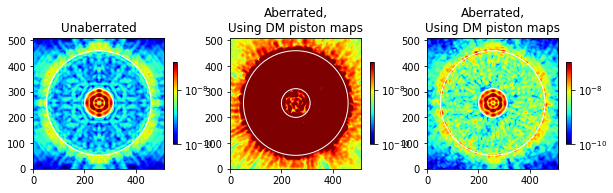

In [13]:
import run_spc_wide
run_spc_wide.run_spc_wide_new()

4.252458802590218e-06 m / pix


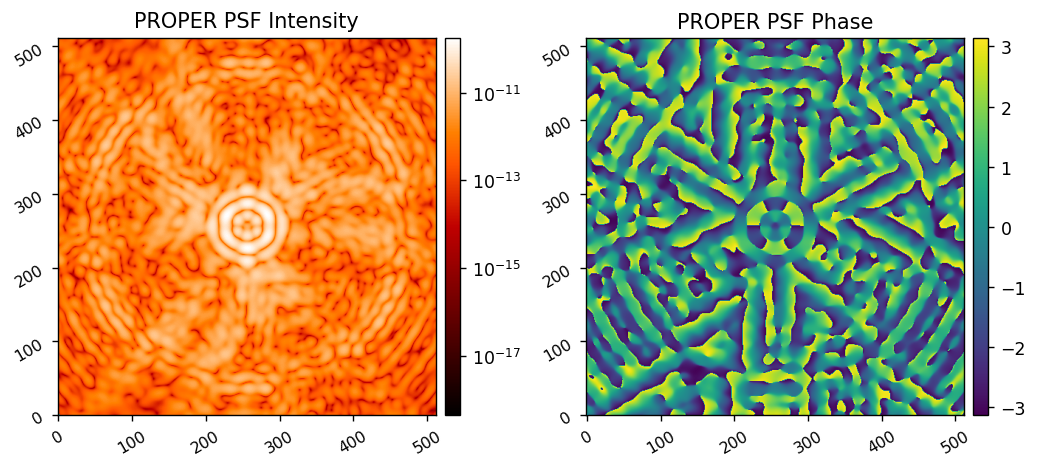

In [14]:
nlam = 7
lam0 = 0.825
bandwidth = 0.114
minlam = lam0 * (1 - bandwidth/2)
maxlam = lam0 * (1 + bandwidth/2)
lam_array = np.linspace( minlam, maxlam, nlam )
lam_array = np.array([0.825])

n = 512                 # output image dimension (must be power of 2)
final_sampling = 0.1    # output sampling in lam0/D

xoffset = 0
use_fpm = 1

use_errors = 0
use_dm1 = 0
use_dm2 = 0
dm1 = proper.prop_fits_read( roman_phasec_proper.lib_dir + r'/examples/spc_wide_band4_best_contrast_dm1.fits' )
dm2 = proper.prop_fits_read( roman_phasec_proper.lib_dir + r'/examples/spc_wide_band4_best_contrast_dm2.fits' )
polaxis = 0

(wfs, wfs_sampling_m) = proper.prop_run_multi('roman_phasec', lam_array, n, QUIET=True, 
                                                PASSVALUE={'cor_type':'spc-wide',
                                                           'final_sampling_lam0':final_sampling, 
                                                           'source_x_offset':xoffset,
                                                           'use_fpm':use_fpm,
                                                           'use_errors': use_errors,
                                                           'use_dm1':use_dm1, 'dm1_m':dm1, 
                                                           'use_dm2':use_dm2, 'dm2_m':dm2,
                                                           'polaxis':polaxis,
                                                          })
# psfs = np.abs(wfs)**2
# psf = np.sum( psfs, 0 ) / nlam

psf = wfs[0]
psf_sampling_m = wfs_sampling_m[0]*u.m/u.pix

reload(misc)
innwa = 5.6/final_sampling*psf_sampling_m.value * 1000 # inner and outer working angles in units of m
outwa = 20.4/final_sampling*psf_sampling_m.value * 1000
patches1 = [Circle((0,0),innwa,edgecolor='c', facecolor='none',lw=1),
            Circle((0,0),outwa,edgecolor='c', facecolor='none',lw=1)]
patches2 = [Circle((0,0),innwa,edgecolor='c', facecolor='none',lw=1),
            Circle((0,0),outwa,edgecolor='c', facecolor='none',lw=1)]
print(psf_sampling_m)
misc.myimshow2(np.abs(psf)**2, np.angle(wfs[0]),
               'PROPER PSF Intensity', 'PROPER PSF Phase',
               pxscl=psf_sampling_m.to(u.mm/u.pix),
               lognorm1=True, cmap1='gist_heat', cmap2='viridis',
               patches1=patches1, patches2=patches2)

save=False
if save:
    wf = np.zeros(shape=(2,n,n))
    wf[0,:,:] = np.abs(wfs[0])**2
    wf[1,:,:] = np.angle(wfs[0])

    wf_fname = 'proper-psfs-phasec/spc-spec/proper_psf_offax_nofs.fits'

    hdr = fits.Header()
    hdr['PIXELSCL'] = psf_sampling_m.value
    hdr['PIXSCLLD'] = final_sampling
    wf_hdu = fits.PrimaryHDU(data=wf, header=hdr)
    wf_hdu.writeto(wf_fname, overwrite=True)